## Final Project: Home Lifestyles and Student Performance in School

This data analysis is created for the purpose of analyzing how students in different family conditions differ in their grade performance.
Our final goal is to find out the correlation between different home lifestyles and student performance in school. We are looking for a correlation regarding quality of life and the impact it has or does not have on students and hoping to research the connection "Does home life have an academic impact on students?"

## Step 1

Import packages that have the functions and resources that we need and read our dataset.

In [137]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.utils import shuffle

In [138]:
pd.set_option('display.max_columns',None)
df_mat = pd.read_csv("student-mat-final-project.csv")

In [139]:
df_por = pd.read_csv("student-por-final-project.csv")

## Step 2 

We read the all the data to give us an overall idea of what to do and what variables we will be examine later in the program.

In [140]:
print(df_por)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     reason guardian  traveltime  studytime  failur

## Step 3

We merge the two dataset that we're using for the analysis

In [141]:
df = pd.concat([df_mat, df_por])

## Step 4

We calaulate the average grade for G1 to G3 and named it as total grade for later use and drop those individual grades since we're not using it anymore.

In [142]:
df['total grade'] = (df['G1']+df['G2']+df['G3'])/3
df = df.drop(['G1','G2','G3'],axis=1)

## Step 5

We then get the length and shape for our data to have a basic idea of how big of amount our data is.

In [143]:
print("\nThe Length of The Data: ", len(df))


The Length of The Data:  1044


In [144]:
print("\nThe Shape of The Data: ", df.shape)


The Shape of The Data:  (1044, 31)


## Step 6

We show all the data type for our variables.

In [145]:
print("\nThe Information of The Data: ")
print(df.info())


The Information of The Data: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       1044 non-null   object 
 1   sex          1044 non-null   object 
 2   age          1044 non-null   int64  
 3   address      1044 non-null   object 
 4   famsize      1044 non-null   object 
 5   Pstatus      1044 non-null   object 
 6   Medu         1044 non-null   int64  
 7   Fedu         1044 non-null   int64  
 8   Mjob         1044 non-null   object 
 9   Fjob         1044 non-null   object 
 10  reason       1044 non-null   object 
 11  guardian     1044 non-null   object 
 12  traveltime   1044 non-null   int64  
 13  studytime    1044 non-null   int64  
 14  failures     1044 non-null   int64  
 15  schoolsup    1044 non-null   object 
 16  famsup       1044 non-null   object 
 17  paid         1044 non-null   object 
 18  activities   1044 

## Step 7

We print out the descriptive statistics for all the variables. This step intends to give us a big picture of how the graphs might looks like later in our program and our dataset's center, range, spread, and overall distribution.

In [146]:
print("\nThe Statistical Calculations: ")
print(df.describe().T)


The Statistical Calculations: 
              count       mean       std        min        25%        50%  \
age          1044.0  16.726054  1.239975  15.000000  16.000000  17.000000   
Medu         1044.0   2.603448  1.124907   0.000000   2.000000   3.000000   
Fedu         1044.0   2.387931  1.099938   0.000000   1.000000   2.000000   
traveltime   1044.0   1.522989  0.731727   1.000000   1.000000   1.000000   
studytime    1044.0   1.970307  0.834353   1.000000   1.000000   2.000000   
failures     1044.0   0.264368  0.656142   0.000000   0.000000   0.000000   
famrel       1044.0   3.935824  0.933401   1.000000   4.000000   4.000000   
freetime     1044.0   3.201149  1.031507   1.000000   3.000000   3.000000   
goout        1044.0   3.156130  1.152575   1.000000   2.000000   3.000000   
Dalc         1044.0   1.494253  0.911714   1.000000   1.000000   1.000000   
Walc         1044.0   2.284483  1.285105   1.000000   1.000000   2.000000   
health       1044.0   3.543103  1.424703   1

## Step 8

We print out the number of unique value there is for each variables.

In [147]:
print("\nThe Unique Data: ")
print(df.nunique())


The Unique Data: 
school          2
sex             2
age             8
address         2
famsize         2
Pstatus         2
Medu            5
Fedu            5
Mjob            5
Fjob            5
reason          4
guardian        3
traveltime      4
studytime       4
failures        4
schoolsup       2
famsup          2
paid            2
activities      2
nursery         2
higher          2
internet        2
romantic        2
famrel          5
freetime        5
goout           5
Dalc            5
Walc            5
health          5
absences       35
total grade    54
dtype: int64


## Step 9

We renamed all the confusing variable names to help us better understand what the variables represent.

In [148]:
df.columns = df.columns.str.capitalize()
df.rename(columns={'Famsize': 'Family Size',
                   'Pstatus': 'Parent Cohabitation Status',
                   'Medu': 'Mother Education',
                   'Fedu': 'Father Education',
                   'Mjob': 'Mother Job',
                   'Fjob': 'Father Job',
                   'Traveltime': 'Travel Time',
                   'Studytime': 'Study Time',
                   'Schoolsup': 'Extra Educational Support',
                   'Famsup': 'Family Educational Support',
                   'Paid': 'Extra Paid Course',
                   'Activities': 'Extracurricular Activities',
                   'Nursery': 'Attending Nursery School',
                   'Higher': 'Wants To Take Higher Ed',
                   'Internet': 'Internet Access',
                   'Romantic': 'Romantic Relationship',
                   'Famrel': 'Family Relationship',
                   'Freetime': 'Free Time After School',
                   'Goout': 'Going Out With Friends',
                   'Dalc': 'Workday Alcohol Consumption',
                   'Walc': 'Weekend Alcohol Consumption',
                   'Health': 'Current Health Status',
                   'Absences': 'Number of School Absences',
                   'Total grade': 'Total Grade'}, inplace=True)

## Step 10

We visulize the distribution of The Parent Cohabitation Status in bar chart.

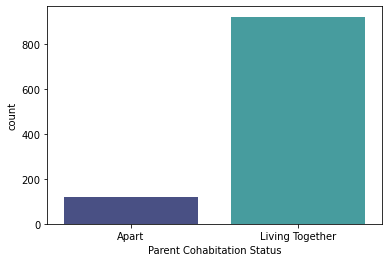

In [149]:
mask_pstatus = {'T':'Living Together',
                'A':'Apart'}
df['Parent Cohabitation Status'] = df['Parent Cohabitation Status'].map(mask_pstatus)
sns.countplot(x=df['Parent Cohabitation Status'], palette='mako')
plt.show()

## Step 11

We visulize the distribution of the count of different amount of failures in bar chart.

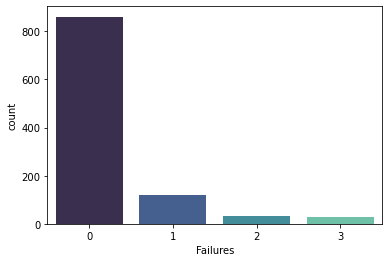

In [150]:
sns.countplot(x=df['Failures'], palette='mako')
plt.show()

## Step 12

We visulize the distribution of the count of different family education support in bar chart.

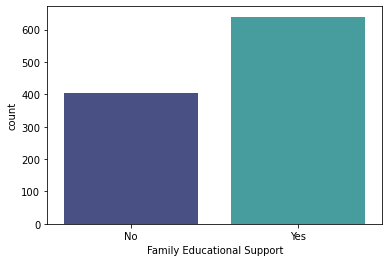

In [151]:
#Checking The Family Educational Support Column
mask_famsup = {'yes':'Yes',
               'no':'No'}
df['Family Educational Support'] = df['Family Educational Support'].map(mask_famsup)
sns.countplot(x=df['Family Educational Support'], palette='mako')
plt.show()

## Step 13

We visulize the distribution of the count of different family relationship in bar chart.

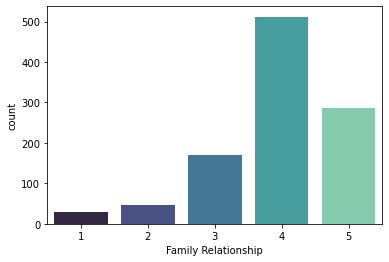

In [152]:
sns.countplot(x=df['Family Relationship'], palette='mako')
plt.show()

## Step 14

We visulize the distribution of the count of different amount of failures in different family relationship in female and male in 5 side by side bar chart according to the levels of family relationship.

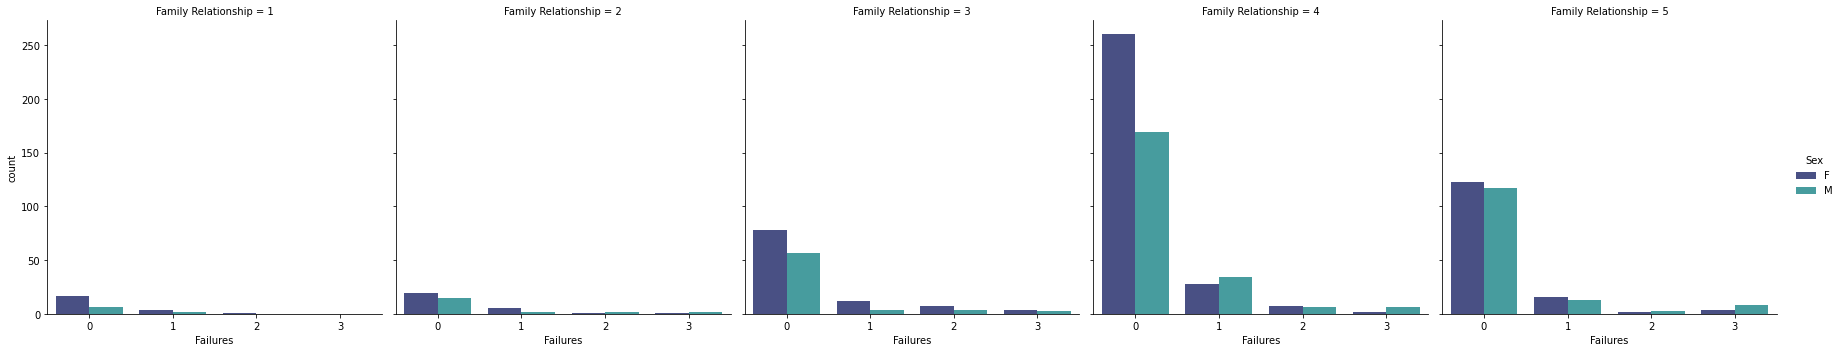

In [153]:
sns.catplot(x='Failures', hue='Sex', col='Family Relationship', data=df, kind='count', palette='mako')
plt.show()

## Step 15

We visulize the distribution of the Total Grade in different family relationship in 5 scatter plots according to the levels of family relationship.

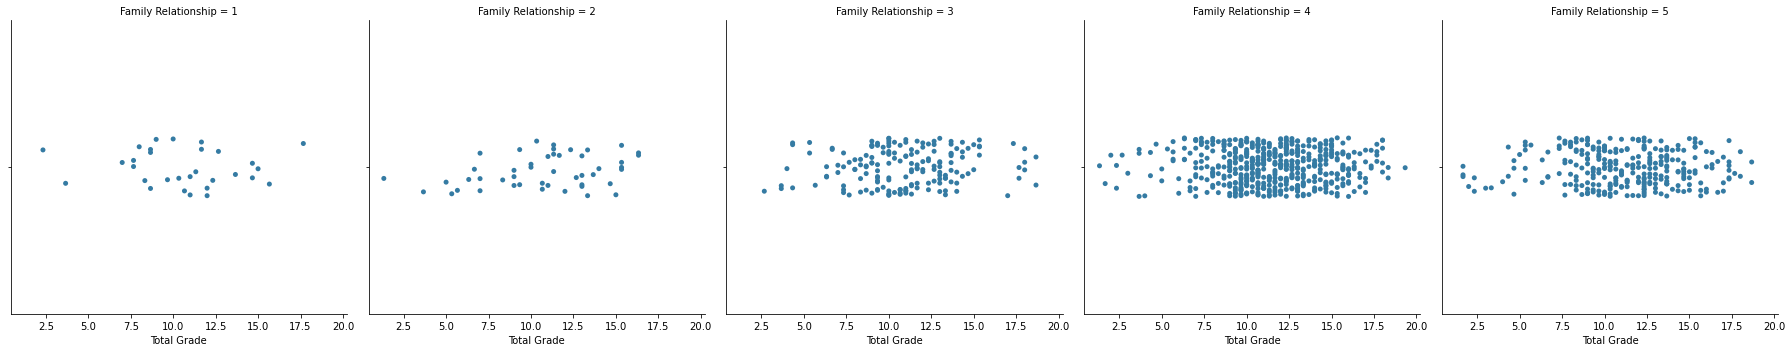

In [154]:
sns.catplot(x='Total Grade', col='Family Relationship', data=df,  palette='mako')
plt.show()

## Step 16

We visulize the distribution of the count in different amount of failures in different family educational support in 2 bar chart according to different family educational support.

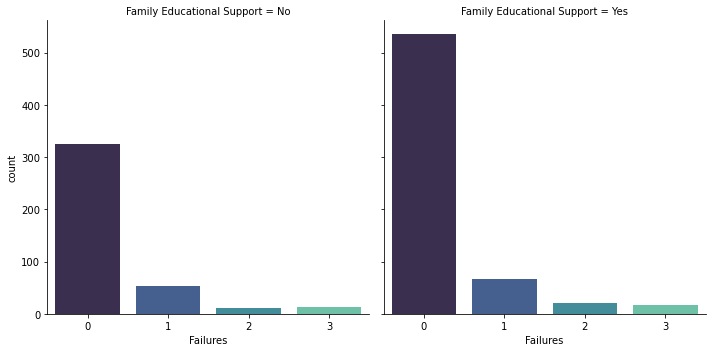

In [155]:
sns.catplot(x='Failures',  col='Family Educational Support', data=df, kind='count', palette='mako')
plt.show()

## Step 17

We visulize the distribution of the count in different family educational support in different family relationship in 5 bar chart according to the levels of family relationship.

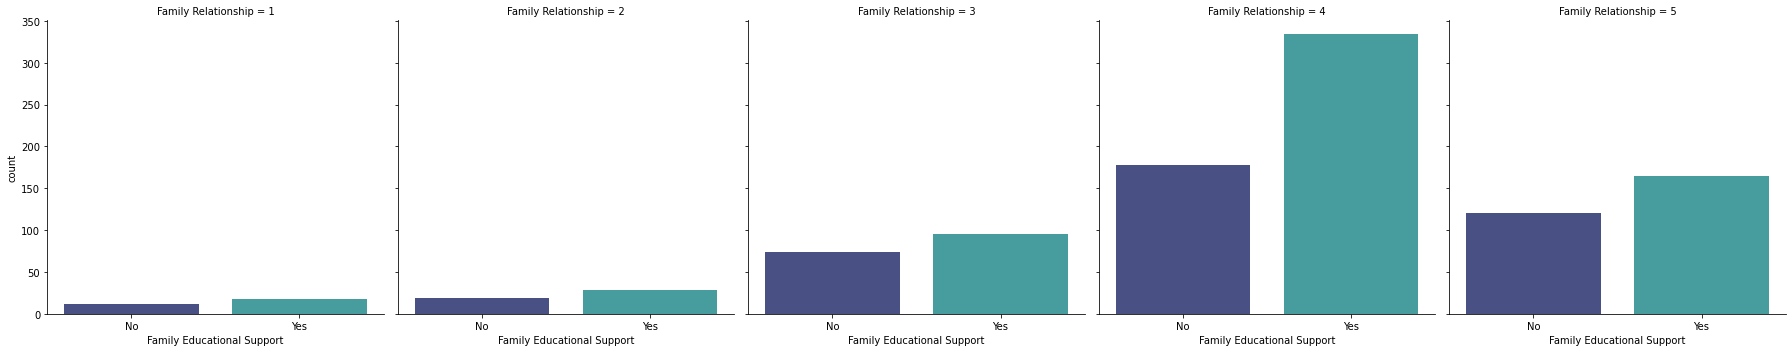

In [156]:
sns.catplot(x='Family Educational Support',  col='Family Relationship', data=df, kind='count', palette='mako')
plt.show()

## Step 18

We visulize the distribution of the count in different family educational support in different Parent Cohabitation Status in 2 bar chart according to the Parent Cohabitation Status.

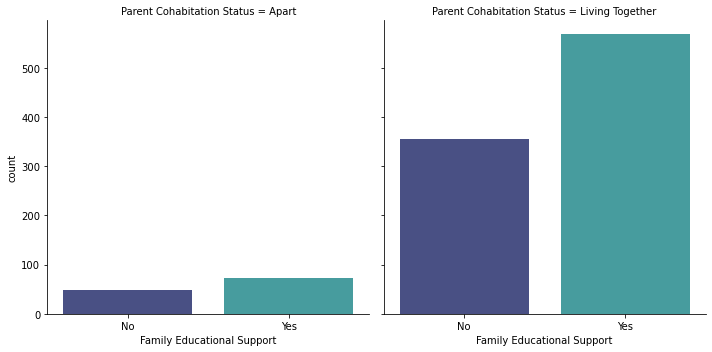

In [157]:
sns.catplot(x='Family Educational Support',  col='Parent Cohabitation Status', data=df, kind='count', palette='mako')
plt.show()

## Step 19

We visulize the distribution of the count in different amount of failures in different Parent Cohabitation Status in 2 bar chart according to the Parent Cohabitation Status.

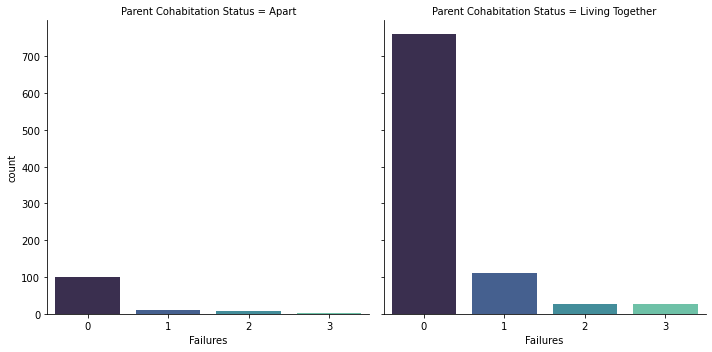

In [158]:
sns.catplot(x='Failures',  col='Parent Cohabitation Status', data=df, kind='count', palette='mako')
plt.show() 


## Step 20

We visulize the distribution of the count in different Parent Cohabitation Status in different family relationship in 5 bar chart according to the levels of family relationship.

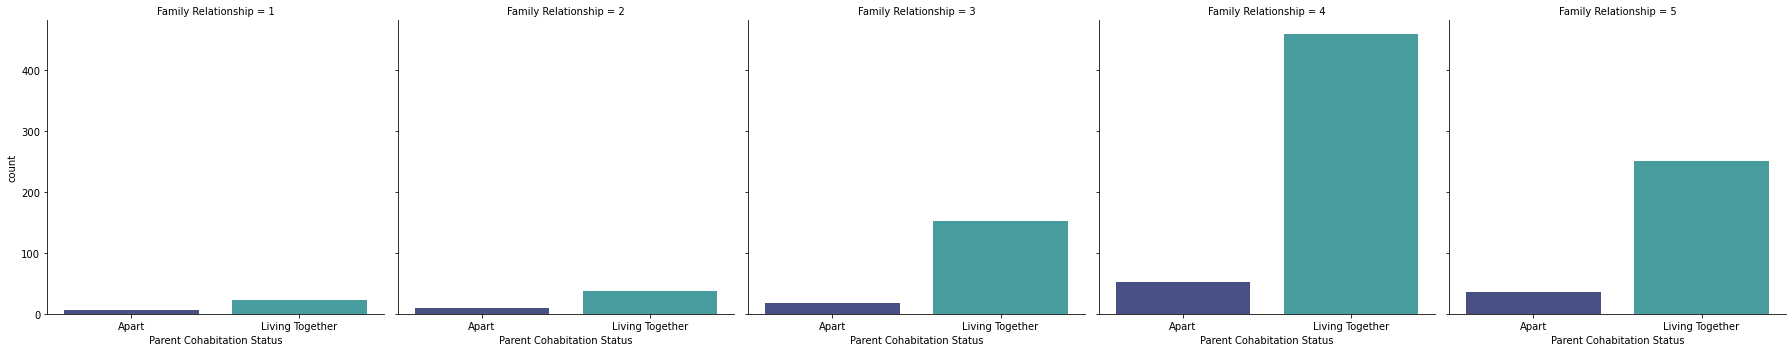

In [159]:
sns.catplot(x='Parent Cohabitation Status',  col='Family Relationship', data=df, kind='count', palette='mako')
plt.show()

## Step 21

We checked our data's information and attributes again.

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School                       1044 non-null   object 
 1   Sex                          1044 non-null   object 
 2   Age                          1044 non-null   int64  
 3   Address                      1044 non-null   object 
 4   Family Size                  1044 non-null   object 
 5   Parent Cohabitation Status   1044 non-null   object 
 6   Mother Education             1044 non-null   int64  
 7   Father Education             1044 non-null   int64  
 8   Mother Job                   1044 non-null   object 
 9   Father Job                   1044 non-null   object 
 10  Reason                       1044 non-null   object 
 11  Guardian                     1044 non-null   object 
 12  Travel Time                  1044 non-null   int64  
 13  Study Time         

## Step 22 (Final Step)

In the end we visualized the correlation between 'Family Relationship' and 'Failures' and 'Total Grade' and 'Family Relationship' through a scatter plot with a line of best fit. 

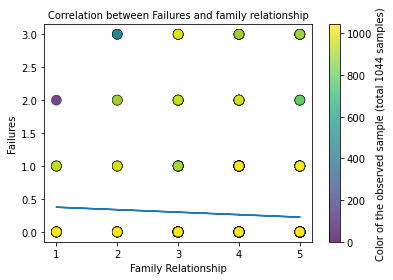

In [161]:
x = df['Family Relationship']
y = df['Failures']
colors = []

for i in range(1044):
    colors = colors + [i]
    
plt.title('Correlation between Failures and family relationship', fontsize = 10)
plt.xlabel('Family Relationship', fontsize = 10)
plt.ylabel('Failures', fontsize = 10)
plt.scatter(x, y, s=100, c=colors, edgecolor='black', linewidth=0.5, alpha=0.75)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.plot

cbar = plt.colorbar()
cbar.set_label('Color of the observed sample (total 1044 samples)')

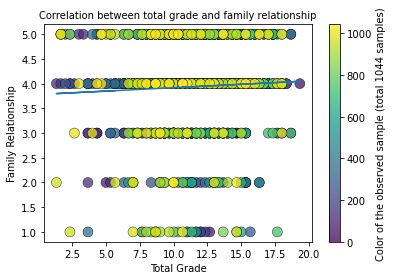

In [162]:
x = df['Total Grade']
y = df['Family Relationship']
colors = []

for i in range(1044):
    colors = colors + [i]
    
plt.title('Correlation between total grade and family relationship', fontsize = 10)
plt.xlabel('Total Grade', fontsize = 10)
plt.ylabel('Family Relationship', fontsize = 10)
plt.scatter(x, y, s=100, c=colors, edgecolor='black', linewidth=0.5, alpha=0.75)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.plot

cbar = plt.colorbar()
cbar.set_label('Color of the observed sample (total 1044 samples)')

## Conclusion

As our graphs in the end shows a strong negative correlation in 'Family Relationship' VS 'Failures', it indicates that when student has a better relationship with his/her family, there will be less failure in their performace. As the second graph shows a strong positive correlation in 'Total Grade' VS 'Family Relationship', it indicates that as a student's family relatioship get better, it is more likely for them to get a better grade. Therefore, we can conlude that our hypothesis of unhealthy home situations negatively impact student performance and this result can be also apply to different school, calling teachers attention to student's family conditions.